In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=c54aa4d5e2e700887bddefd30fa7121434c034737a8acd3a62d8db0843a51d22
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ml-diabetes").getOrCreate()

In [ ]:
df = spark.read.csv("/content/diabetes.csv",header = True, inferSchema=True)
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5),columns = df.columns).transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [ ]:
df.toPandas()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.groupby("Outcome").count().toPandas()

,Outcome,count
0,1,268
1,0,500


In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] == "int"]
numeric_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'Outcome']

In [ ]:
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pregnancies,768,3.8450520833333335,3.36957806269887,0,17
Glucose,768,120.89453125,31.97261819513622,0,199
BloodPressure,768,69.10546875,19.355807170644777,0,122
SkinThickness,768,20.536458333333332,15.952217567727642,0,99
Insulin,768,79.79947916666667,115.24400235133803,0,846
Age,768,33.240885416666664,11.760231540678689,21,81
Outcome,768,0.3489583333333333,0.476951377242799,0,1


In [ ]:
from pandas.plotting import scatter_matrix
numeric_data = df.select(numeric_features).toPandas()

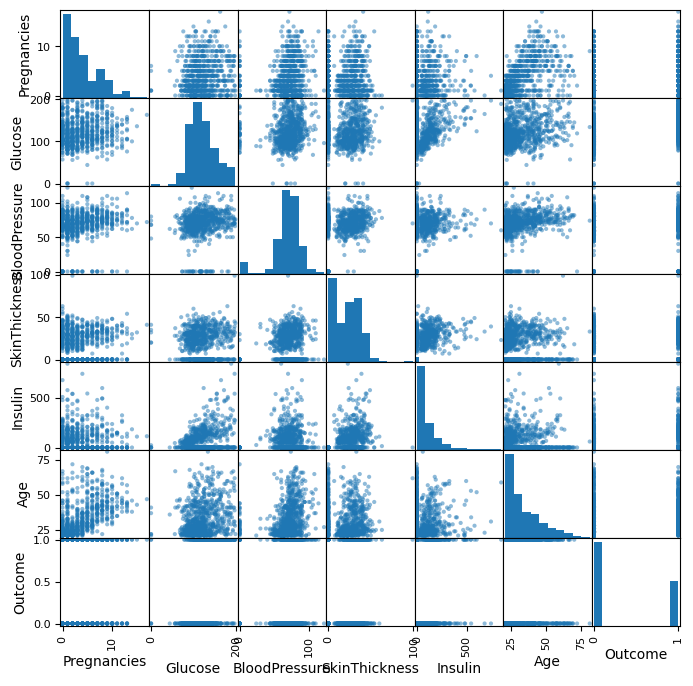

In [ ]:
axs = scatter_matrix(numeric_data,figsize=(8,8))

In [ ]:
n = len(numeric_data.columns)
for i in range(n):
  v = axs[i, 0]
  v.yaxis.label.set_rotation(0)
  v.yaxis.label.set_ha("right")
  v.set_yticks(())
  h = axs[n-1, i]
  h.xaxis.label.set_rotation(90)
  h.set_xticks(())

In [ ]:
from pyspark.sql.functions import isnull,when,count,col
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [ ]:
dataset = df.drop("SkinThickness")
dataset = dataset.drop("Insulin")
dataset.show()

+-----------+-------+-------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+----+------------------------+---+-------+
|          6|    148|           72|33.6|                   0.627| 50|      1|
|          1|     85|           66|26.6|                   0.351| 31|      0|
|          8|    183|           64|23.3|                   0.672| 32|      1|
|          1|     89|           66|28.1|                   0.167| 21|      0|
|          0|    137|           40|43.1|                   2.288| 33|      1|
|          5|    116|           74|25.6|                   0.201| 30|      0|
|          3|     78|           50|31.0|                   0.248| 26|      1|
|         10|    115|            0|35.3|                   0.134| 29|      0|
|          2|    197|           70|30.5|                   0.158| 53|      1|
|          8|    125|           96| 0.0|                   0.232

In [ ]:
dataset_new = dataset.drop("DiabetesPedigreeFunction")
dataset_new.show()

+-----------+-------+-------------+----+---+-------+
|Pregnancies|Glucose|BloodPressure| BMI|Age|Outcome|
+-----------+-------+-------------+----+---+-------+
|          6|    148|           72|33.6| 50|      1|
|          1|     85|           66|26.6| 31|      0|
|          8|    183|           64|23.3| 32|      1|
|          1|     89|           66|28.1| 21|      0|
|          0|    137|           40|43.1| 33|      1|
|          5|    116|           74|25.6| 30|      0|
|          3|     78|           50|31.0| 26|      1|
|         10|    115|            0|35.3| 29|      0|
|          2|    197|           70|30.5| 53|      1|
|          8|    125|           96| 0.0| 54|      1|
|          4|    110|           92|37.6| 30|      0|
|         10|    168|           74|38.0| 34|      1|
|         10|    139|           80|27.1| 57|      0|
|          1|    189|           60|30.1| 59|      1|
|          5|    166|           72|25.8| 51|      1|
|          7|    100|            0|30.0| 32|  

In [ ]:
dataset_final = dataset_new.drop("Pregnancies")
dataset_final.show()

+-------+-------------+----+---+-------+
|Glucose|BloodPressure| BMI|Age|Outcome|
+-------+-------------+----+---+-------+
|    148|           72|33.6| 50|      1|
|     85|           66|26.6| 31|      0|
|    183|           64|23.3| 32|      1|
|     89|           66|28.1| 21|      0|
|    137|           40|43.1| 33|      1|
|    116|           74|25.6| 30|      0|
|     78|           50|31.0| 26|      1|
|    115|            0|35.3| 29|      0|
|    197|           70|30.5| 53|      1|
|    125|           96| 0.0| 54|      1|
|    110|           92|37.6| 30|      0|
|    168|           74|38.0| 34|      1|
|    139|           80|27.1| 57|      0|
|    189|           60|30.1| 59|      1|
|    166|           72|25.8| 51|      1|
|    100|            0|30.0| 32|      1|
|    118|           84|45.8| 31|      1|
|    107|           74|29.6| 31|      1|
|    103|           30|43.3| 33|      0|
|    115|           70|34.6| 32|      1|
+-------+-------------+----+---+-------+
only showing top

In [ ]:
required_feature = ["Glucose","BloodPressure","BMI","Age"]


In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols=required_feature,outputCol="features")

In [ ]:
transformed_data = assembler.transform(dataset_final)
transformed_data.show()

+-------+-------------+----+---+-------+--------------------+
|Glucose|BloodPressure| BMI|Age|Outcome|            features|
+-------+-------------+----+---+-------+--------------------+
|    148|           72|33.6| 50|      1|[148.0,72.0,33.6,...|
|     85|           66|26.6| 31|      0|[85.0,66.0,26.6,3...|
|    183|           64|23.3| 32|      1|[183.0,64.0,23.3,...|
|     89|           66|28.1| 21|      0|[89.0,66.0,28.1,2...|
|    137|           40|43.1| 33|      1|[137.0,40.0,43.1,...|
|    116|           74|25.6| 30|      0|[116.0,74.0,25.6,...|
|     78|           50|31.0| 26|      1|[78.0,50.0,31.0,2...|
|    115|            0|35.3| 29|      0|[115.0,0.0,35.3,2...|
|    197|           70|30.5| 53|      1|[197.0,70.0,30.5,...|
|    125|           96| 0.0| 54|      1|[125.0,96.0,0.0,5...|
|    110|           92|37.6| 30|      0|[110.0,92.0,37.6,...|
|    168|           74|38.0| 34|      1|[168.0,74.0,38.0,...|
|    139|           80|27.1| 57|      0|[139.0,80.0,27.1,...|
|    189

In [ ]:
(training_data,test_data) = transformed_data.randomSplit([0.8,0.2],seed = 20)

In [ ]:
print("Training Dataset Count: " +str(training_data.count()))
print("Test Dataset Count: " +str(test_data.count()))

Training Dataset Count: 603
Test Dataset Count: 165


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = "features",labelCol = "Outcome",maxDepth = 3)
dtModel = dt.fit(training_data)
dt_predictions = dtModel.transform(test_data)
dt_predictions.select("Glucose","BloodPressure","BMI","Age","Outcome").show(10)

+-------+-------------+----+---+-------+
|Glucose|BloodPressure| BMI|Age|Outcome|
+-------+-------------+----+---+-------+
|      0|           68|39.0| 41|      1|
|     65|           72|32.0| 42|      0|
|     71|           48|20.4| 22|      0|
|     71|           62|21.8| 26|      0|
|     74|           68|29.7| 23|      0|
|     76|           62|34.0| 25|      0|
|     80|            0| 0.0| 22|      0|
|     80|           55|19.1| 21|      0|
|     80|           80|39.8| 28|      0|
|     80|           82|34.2| 27|      1|
+-------+-------------+----+---+-------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol = "Outcome",metricName = "accuracy")
print("Decision Tree Accuracy: ", multi_evaluator.evaluate(dt_predictions))

Decision Tree Accuracy:  0.7515151515151515


In [ ]:
#Gradient Boosting
from pyspark.ml.classification import GBTClassifier
gb = GBTClassifier(labelCol = "Outcome",featuresCol = "features")
gbModel = gb.fit(training_data)
gb_predictions = gbModel.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol = "Outcome",metricName ="accuracy")
print("Gradient-Boosted Trees Accuracy: ",multi_evaluator.evaluate(gb_predictions))

Gradient-Boosted Trees Accuracy:  0.7515151515151515
